In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

iris = datasets.load_iris()
mpl.rcParams['figure.figsize'] = (12,8)

In [21]:
X = iris.data[:,[2,3]]
y = iris.target

In [12]:
from sklearn.model_selection import train_test_split

s = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 1)
X_train, X_test, y_train, y_test = s

### Масштабируем

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

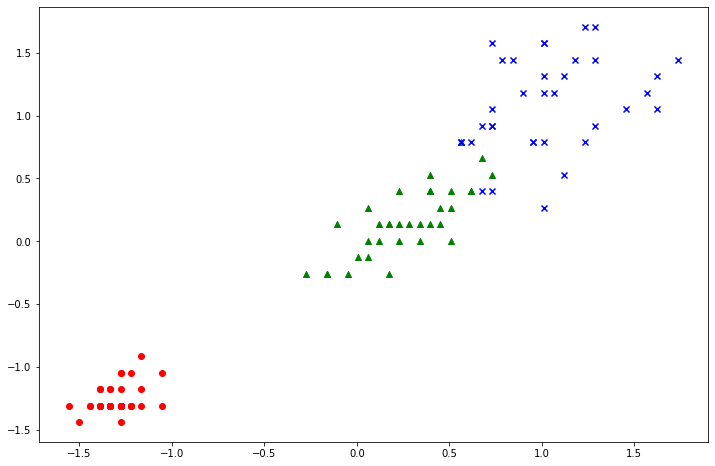

In [16]:
# Тренировочное множество
plt.scatter(X_train_std[y_train==0,0], X_train_std[y_train==0,1], color = 'red', marker='o')
plt.scatter(X_train_std[y_train==1,0], X_train_std[y_train==1,1], color = 'green', marker='^')
plt.scatter(X_train_std[y_train==2,0], X_train_std[y_train==2,1], color = 'blue', marker='x')

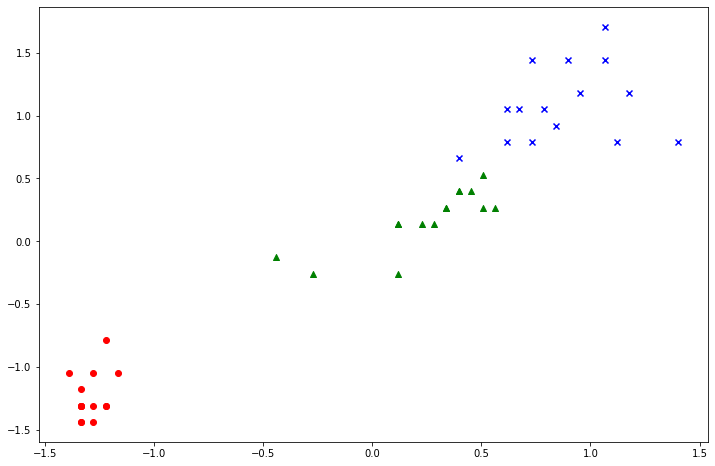

In [17]:
# Тестовое множество
plt.scatter(X_test_std[y_test==0,0], X_test_std[y_test==0,1], color = 'red', marker='o')
plt.scatter(X_test_std[y_test==1,0], X_test_std[y_test==1,1], color = 'green', marker='^')
plt.scatter(X_test_std[y_test==2,0], X_test_std[y_test==2,1], color = 'blue', marker='x')

### Study perceptron

In [18]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state=1).fit(X_train_std, y_train)

In [20]:
y_train_pred = ppn.predict(X_train_std)
(y_train != y_train_pred).sum()  # number of errors

6

In [21]:
y_test_pred = ppn.predict(X_test_std)
(y_test != y_test_pred).sum()  # number of errors

1

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)*100

94.28571428571428

In [23]:
accuracy_score(y_test, y_test_pred)*100

97.77777777777777

In [24]:
ppn.score(X_test_std, y_test)

0.9777777777777777

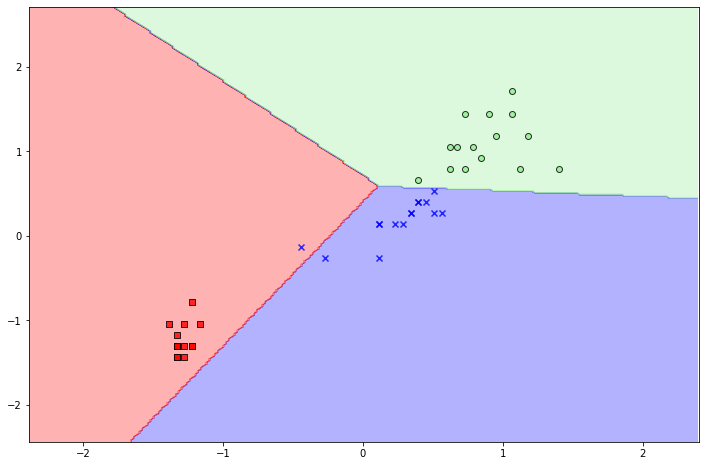

In [27]:
from Regions import plot_decision_regions

plot_decision_regions(X_test_std, y_test, classifier = ppn)

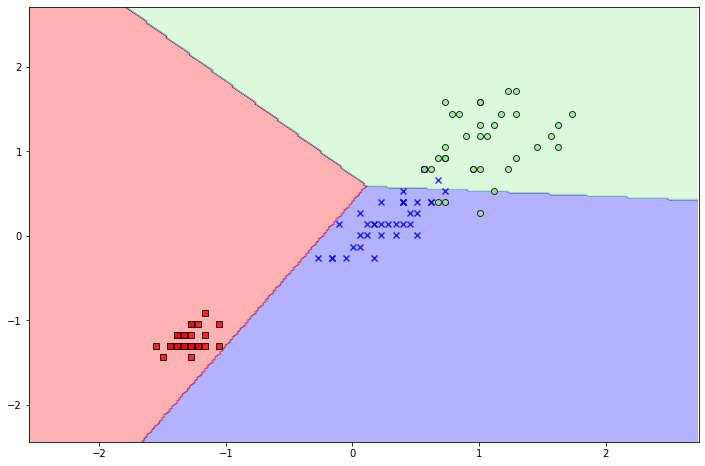

In [28]:
plot_decision_regions(X_train_std, y_train, classifier = ppn)